<a href="https://colab.research.google.com/github/mingmingbupt/tensorflow/blob/master/tf_keras_regression_wide_deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

1.15.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.0
numpy 1.18.2
pandas 0.25.3
sklearn 0.22.2.post1
tensorflow 1.15.0
tensorflow.python.keras.api._v1.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
import pprint
pprint.pprint(x_train[0:5]) # 这个函数可以使得打印的format呢比较好，只打印5个数据
pprint.pprint(x_valid[0:5])

array([[ 5.34500000e+00,  3.20000000e+01,  5.13541667e+00,
         9.96527778e-01,  8.30000000e+02,  2.88194444e+00,
         3.43800000e+01, -1.19740000e+02],
       [ 3.28130000e+00,  3.30000000e+01,  5.15268817e+00,
         9.72043011e-01,  1.39100000e+03,  2.99139785e+00,
         3.79600000e+01, -1.21700000e+02],
       [ 3.78330000e+00,  1.70000000e+01,  6.05769231e+00,
         1.09615385e+00,  8.77000000e+02,  2.81089744e+00,
         3.90700000e+01, -1.23210000e+02],
       [ 7.41850000e+00,  3.50000000e+01,  6.51890034e+00,
         9.58762887e-01,  7.33000000e+02,  2.51890034e+00,
         3.41300000e+01, -1.18080000e+02],
       [ 1.11228000e+01,  1.70000000e+01,  8.58670520e+00,
         1.01156069e+00,  1.18000000e+03,  3.41040462e+00,
         3.38300000e+01, -1.17800000e+02]])
array([[ 4.22060000e+00,  4.00000000e+01,  5.16483516e+00,
         9.34065934e-01,  9.32000000e+02,  3.41391941e+00,
         3.39800000e+01, -1.18060000e+02],
       [ 3.15910000e+00,  2.00000

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [14]:
import pprint
pprint.pprint(x_train_scaled[0:5]) # 这个函数可以使得打印的format呢比较好，只打印5个数据
pprint.pprint(x_valid_scaled[0:5])

array([[ 0.80154431,  0.27216142, -0.11624393, -0.20231151, -0.54305157,
        -0.02103962, -0.58976206, -0.08241846],
       [-0.29807281,  0.35226166, -0.10920508, -0.25055521, -0.03406402,
        -0.006034  ,  1.08055484, -1.06113817],
       [-0.03058829, -0.92934213,  0.25962148, -0.00601274, -0.50040912,
        -0.03077987,  1.59844639, -1.81515182],
       [ 1.90638325,  0.51246213,  0.4475828 , -0.27672178, -0.63105833,
        -0.07081147, -0.7064043 ,  0.74649722],
       [ 3.88017387, -0.92934213,  1.29029867, -0.17269133, -0.22550141,
         0.0514101 , -0.84637499,  0.88631432]])
array([[ 0.20242163,  0.91296332, -0.10425467, -0.32538355, -0.45050838,
         0.05189196, -0.77638965,  0.75648415],
       [-0.36318557, -2.13084567, -0.32114086, -0.75842872, -1.19266848,
        -0.09718457,  0.99657243, -1.17598793],
       [-0.56784853,  1.71396568, -0.99696418,  0.45289485, -0.94951578,
        -0.19233623, -0.84637499,  0.63164745],
       [-0.66898112,  0.7527628

In [21]:
x_train_scaled.min()

-2.3594398206242224

In [22]:
# 因为我们的wide&deep不是一个严格的层级结构，而是有两部分组成的，每一部分都是一层级结构
# 因而我们并不能去使用Sequential的方式去实现这个模型了
# 所以这里我们使用函数式API来实现
# 函数式API 功能API
# 函数式API 是指我们像使用函数一样去调用keras model里面的一些层次
#
input = keras.layers.Input(shape=x_train_scaled.shape[1:]) #定义输入， keras有专门的输入层Input
hidden1 = keras.layers.Dense(30, activation='relu')(input) # 第一层 这里我们只定义层次，这个层次呢，我们可以像使用函数一样使用他，这就是函数式API的
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1) # 第二层 他的输入为hidden1
# 复合函数: f(x) = h(g(x))

concat = keras.layers.concatenate([input, hidden2]) #假设wide模型和deep模型的输入是一样的，把input和hidden2拼接起来，拼接也被实现为一个层次
#input 是wide的输入，hidden2是deep的输出
output = keras.layers.Dense(1)(concat) #拼接好以后的数据再把它作为最后的输出

# 我们就用函数式的方法把这个模型实现好了
# 我们需要用Model把这个模型固化下来
# 我们使用Sequential的时候，返回的就是一个固化好的方式，函数式的没有使用固化好的方式，
# 所以我们需要使用keras.models.Model固化下来
model = keras.models.Model(inputs = [input],outputs = [output])


model.summary()
model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           270         input_3[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 30)           930         dense_6[0][0]                    
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 38)           0           input_3[0][0]                    
                                                                 dense_7[0][0]              

In [23]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 48us/sample - loss: 1.9664 - val_loss: 4.1509
Epoch 2/100
11610/11610 [==============================] - 0s 39us/sample - loss: nan - val_loss: nan
Epoch 3/100
11610/11610 [==============================] - 0s 40us/sample - loss: nan - val_loss: nan
Epoch 4/100
11610/11610 [==============================] - 0s 39us/sample - loss: nan - val_loss: nan
Epoch 5/100
11610/11610 [==============================] - 0s 41us/sample - loss: nan - val_loss: nan
Epoch 6/100
11610/11610 [==============================] - 0s 41us/sample - loss: nan - val_loss: nan


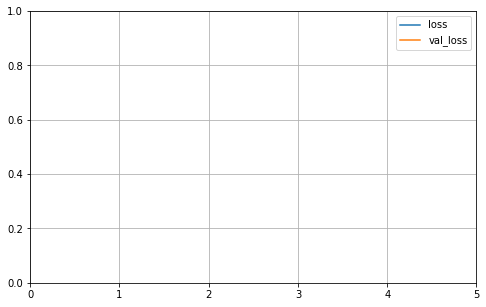

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [10]:
model.evaluate(x_test_scaled, y_test)

5160/5160 [==============================] - 0s 22us/sample - loss: 38157038620133154816.0000


3.815703862013315e+19